# Running your first example

In this section we run an example simulation of MUSE and visualise the results. There are a number of different examples in the source code, which can be found [INSERT LINK HERE](tutorial-code/). 

Once python and MUSE have been installed, we can run an example. To do this open anaconda prompt. Then change directory to where you have downloaded the MUSE source code. 

Navigate to the following link for MacOS or Linux based operating systems:

`{MUSE_download_location}/StarMuse/run/example/default/`

Change ```{MUSE_download_location}``` to the location you downloaded MUSE to, for example ```Users/{my_name}/Documents/``` using the `cd` command, or "change directory" command. Once we have navigated to the directory containing the example settings ```settings.toml``` we can run the simulation using the following command in the anaconda prompt or terminal:

`python -m muse settings.toml`

If running correctly, your prompt should output text similar to that which can be found [here](example-output.ipynb).

It is also possible to run MUSE directly in python using the following code:

In [ ]:
from muse import examples
model = examples.model("default")
model.run()

## Results

If the default MUSE example has run successfully, you should now have a folder called ```Results``` in the same directory as ```settings.toml```.

This directory should contain results for each sector (```Gas```,```Power``` and ```Residential```) as well as results for the entire simulation in the form of ```MCACapacity.csv``` and ```MCAPrices.csv```. 

- ```MCACapacity.csv``` contains information about the capacity each agent has for each technology per benchmark year. Each benchmark year is the modelled year in the `settings.toml` file. In our example, this is 2020, 2025, ..., 2050. 

- ```MCAPrices.csv``` has the price of each commodity per benchmark year and timeslice. eg. the cost of electricity at night for electricity in 2020.

Within each of the sector result folders, there is an output for ```Capacity``` for each commodity in each year. The years into the future, which the simulation has not run to, refers to the capacity as it retires. Within the ```Residential``` folder there is also a folder for ```Supply``` within each year. This refers to how much end-use commodity was output.

The output can be fully configurable, as shown in the developer guide [here](advanced-guide/extending-muse.ipynb).

## Using Python

For the following parts of the tutorial, we will use python to run MUSE and visualise our results.

A common approach for data visualisation is to use [Jupyter Notebook](https://jupyter.org). Jupyter Notebook is a method of running interactive computing across dozens of programming languages. You are free to visualise the results using the language or program of your choice, for example Excel, R, Matlab or Python. 

We will use Python, however. This is because MUSE is built using python, and so we can switch between running MUSE and visualisation rapidly. 

First, you will need to install jupyter notebook in your anaconda environment. You will need to ensure that you have a conda environment activated. If you are using the Anaconda Powershell Prompt, you will see something similar to the following if your conda environment called muse is activated:

`(muse) PS C:\Users\my_name>`

If your environment is not activated you will see:

`(base) PS C:\Users\my_name>`

Once you see that the environment is activated, you can installed Jupyter Notebook by following the instructions showed [here](https://jupyter.org/install). We will install the classic Jupyter Notebook, and so we will run the following code to install it:

`conda install -c conda-forge notebook`

Once this has been installed you can start Jupyter Notebook by running the following command:

`jupyter notebook`

A web browser should now open up with a URL such as the following: ```http://localhost:8888/tree```. If it doesn't, copy and paste the command as directed in the Anaconda Powershell Prompt. This will likely take the form of:

`http://localhost:8888/?token=xxxxxxxxxx`

Once you are on the page, you will be able to navigate to a location of your choice and create a new file, by clicking the ```new``` button in the top right, followed by clicking the ```Python 3``` button.

You should then be able to proceed and follow the tutorials in this documentation.

If you get any errors such as:

`ModuleNotFoundError: No module named 'pandas'`

It is possible to install the required packages by running the following in the Anaconda Powershell Prompt:

`conda install pandas`

or running the following in jupyter notebook:

`!conda install pandas`

## Visualisation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Next, we load the dataset of interest to us for this example: the ```MCACapacity.csv``` file. We do this using pandas.

In [2]:
capacity_results = pd.read_csv("Results/MCAcapacity.csv")
capacity_results.head()

,technology,region,agent,type,sector,capacity,year
0,gasboiler,R1,A1,retrofit,residential,10.0,2020
1,gasCCGT,R1,A1,retrofit,power,1.0,2020
2,gassupply1,R1,A1,retrofit,gas,15.0,2020
3,gasboiler,R1,A1,retrofit,residential,5.0,2025
4,heatpump,R1,A1,retrofit,residential,19.0,2025


Using the ```head``` command we print the first five rows of our dataset. Next, we will visualise each of the sectors, with capacity on the y-axis and year on the x-axis.

Don't worry too much about the code if some of it is unfamiliar. We effectively split the data into each sector and then plot a line plot for each.

gas sector


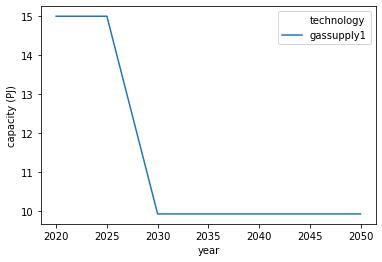

power sector


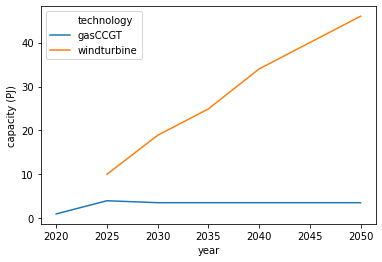

residential sector


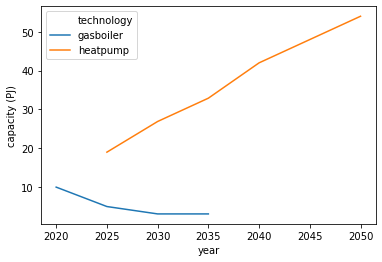

In [3]:
for sector_name, results in capacity_results.groupby("sector"):
    print("{} sector".format(sector_name))
    sns.lineplot(data=results, x="year", y="capacity", hue="technology")
    plt.ylabel("capacity (PJ)")
    plt.show()
    plt.close()

In this toy example, we can see that the end-use technology of choice in the residential sector becomes a heatpump. The heatpump displaces the gas boiler. Therefore, the supply of gas crashes due to a reduced demand. To account for the increase in demand for electricity, the agent invests heavily in wind turbines.

Note, that the units are in petajoules (PJ). MUSE requires consistent units across each of the sectors, and each of the input files (which we will see later). The model does not make any unit conversion internally.

## Next steps

If you want to jump straight into customising your own example scenarios, head to the link [here](user-guide/index.rst). If you would like a little bit of background based on how MUSE works first, head to the next section!